In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
%matplotlib inline
from pyqg import sqg_model

In [2]:
# create the model object
year = 1.
m = sqg_model.SQGModel(L=2.*pi,nx=512, tmax = 26.005,
        beta = 0., Nb = 1., H = 1., f_0 = 1., dt = 0.005,
                     taveint=1, twrite=400, ntd=4)
# in this example we used ntd=4, four threads
# if your machine has more (or fewer) cores available, you could try changing it

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/home/exouser/anaconda3/envs/torch_gpu/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [3]:
# Choose ICs from Held et al. (1995)
# case i) Elliptical vortex
x = np.linspace(m.dx/2,2*np.pi,m.nx) - np.pi
y = np.linspace(m.dy/2,2*np.pi,m.ny) - np.pi
x,y = np.meshgrid(x,y)

qi = -np.exp(-(x**2 + (4.0*y)**2)/(m.L/6.0)**2)


In [4]:
# initialize the model with that initial condition
m.set_q(qi[np.newaxis,:,:])

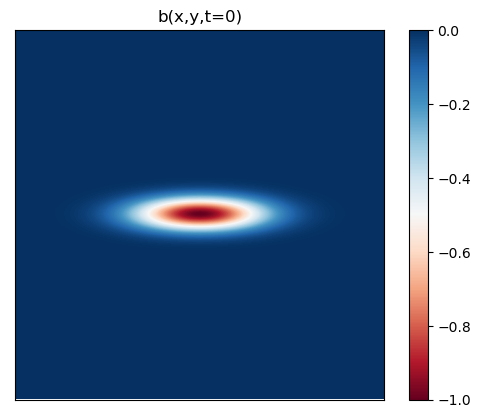

In [5]:
# Plot the ICs
plt.rcParams['image.cmap'] = 'RdBu'
plt.clf()
p1 = plt.imshow(m.q.squeeze() + m.beta * m.y)
plt.title('b(x,y,t=0)')
plt.colorbar()
plt.clim([-1, 0])
plt.xticks([])
plt.yticks([])
plt.show()

INFO: Step: 400, Time: 2.00e+00, KE: 5.21e-03, CFL: 0.245


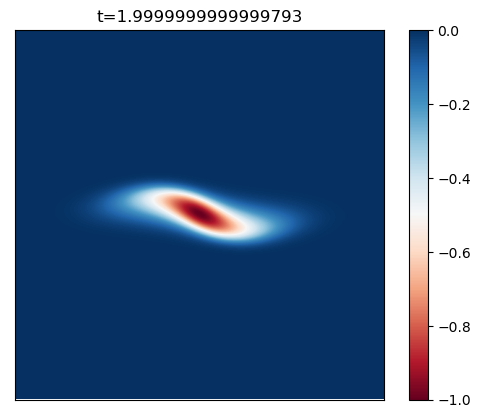

INFO: Step: 800, Time: 4.00e+00, KE: 5.21e-03, CFL: 0.239


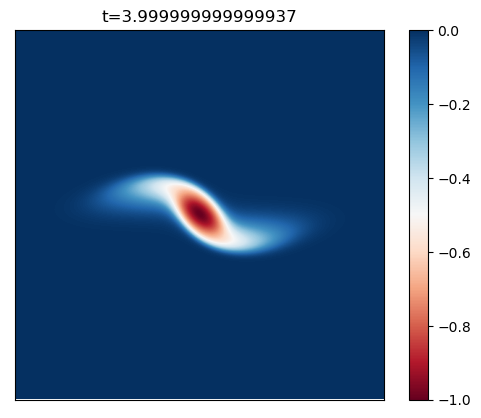

INFO: Step: 1200, Time: 6.00e+00, KE: 5.21e-03, CFL: 0.261


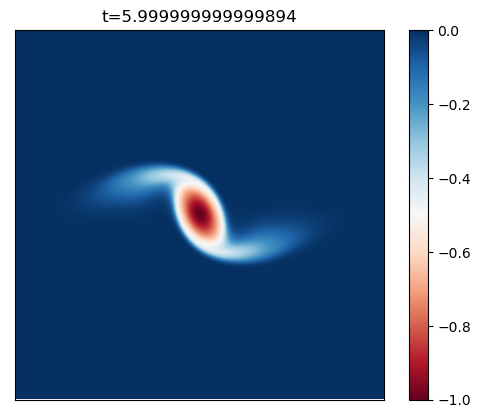

INFO: Step: 1600, Time: 8.00e+00, KE: 5.21e-03, CFL: 0.273


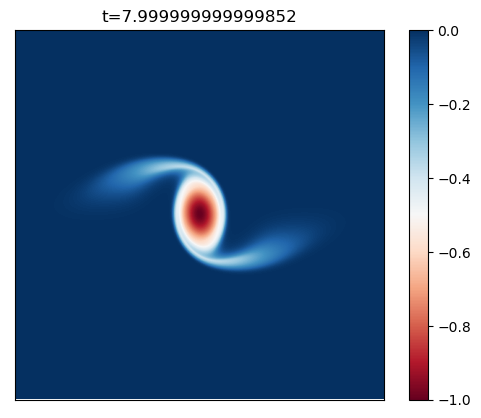

INFO: Step: 2000, Time: 1.00e+01, KE: 5.21e-03, CFL: 0.267


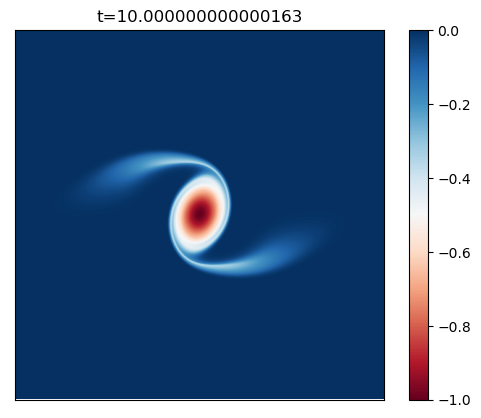

INFO: Step: 2400, Time: 1.20e+01, KE: 5.21e-03, CFL: 0.247


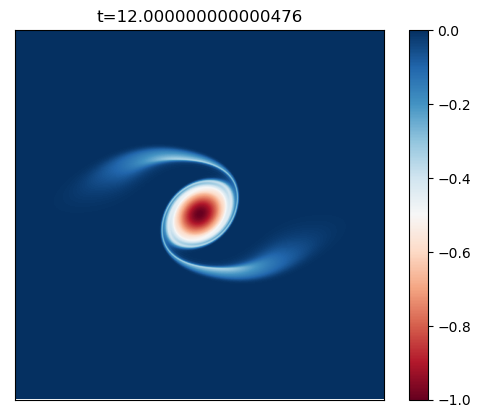

INFO: Step: 2800, Time: 1.40e+01, KE: 5.20e-03, CFL: 0.254


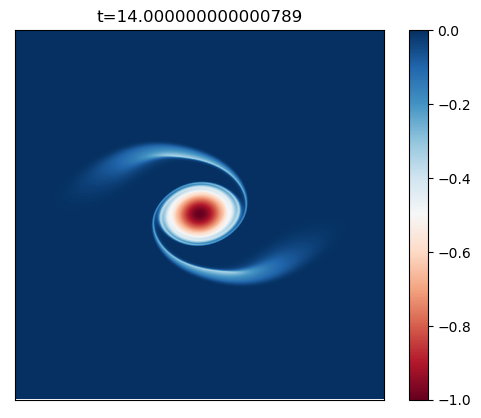

INFO: Step: 3200, Time: 1.60e+01, KE: 5.20e-03, CFL: 0.259


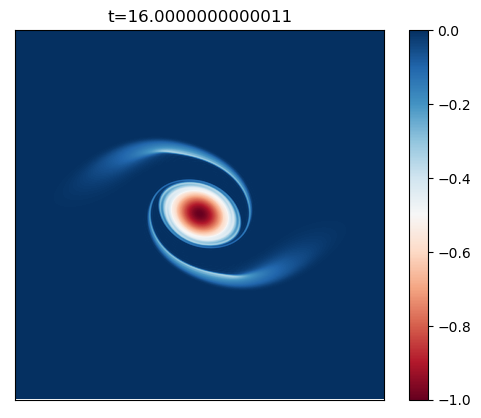

In [6]:
for snapshot in m.run_with_snapshots(tsnapstart=0., tsnapint=400*m.dt):
    plt.clf()
    p1 = plt.imshow(m.q.squeeze() + m.beta * m.y)
    #plt.clim([-30., 30.])
    plt.title('t='+str(m.t))
    plt.colorbar()
    plt.clim([-1, 0])
    plt.xticks([])
    plt.yticks([])
    plt.show()